<center><img src = "https://static.toiimg.com/thumb/msid-68846795,width-400,resizemode-4/68846795.jpg"></center>

<h2><center>DSECLZG628T: Dissertation  </center></h2>

**Name**: Justin P Mathew <br>
**Supervisor**: Venkata Girish Kumar Nidra <br>
**Examiner**: Raghavendra G S

<h2><center>Predictive Modeling for Policy Lapse Forecasting Using
Machine Learning</center></h2>


In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
#Read the DataSet
df=pd.read_csv('Kaggle.csv', sep=';')

In [3]:
# Setting the option to display all columns
pd.set_option('display.max_columns', None)

#Display first 5 rows
df.head()

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,BENEFIT,NON LAPSE GUARANTEED,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date,Unnamed: 20,Unnamed: 21
0,1,1,1,36,F,1,1,A,Annually,Inforce,"200,000",NO NLG,0.0,0,0.0,N,8.000000,9,280,Aug-11,NaN,NaN
1,1,1,1,42,M,1,2,A,Annually,Inforce,"100,000",NO NLG,0.0,0,0.0,N,8.000000,9,200,Aug-11,NaN,NaN
2,1,1,2,40,M,2,3,A,Annually,Lapse,"80,000",NO NLG,0.0,0,0.0,N,8.000000,9,"1,289",Aug-11,NaN,NaN
3,1,1,3,39,M,1,2,A,Monthly,Lapse,"100,000",NO NLG,0.0,0,0.0,N,8.000000,9,216,Aug-11,NaN,NaN
4,1,1,4,44,M,1,2,A,Annually,Lapse,"100,000",NO NLG,0.0,0,0.0,N,7.916667,8,140,Sep-11,NaN,NaN


In [4]:
# Get the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 185560
Number of columns: 22


In [5]:
# List the Columns
df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'Issue Date',
       'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [6]:
# Display the data types of each column
df.dtypes

,0
CHANNEL1,int64
CHANNEL2,int64
CHANNEL3,int64
ENTRY AGE,int64
SEX,object
POLICY TYPE 1,int64
POLICY TYPE 2,int64
POLICY TYPE 3,object
PAYMENT MODE,object
POLICY STATUS,object


# **Exploratory Data Analysis (EDA)**

In [7]:
# Summary statistics
print(df.describe())

            CHANNEL1       CHANNEL2       CHANNEL3      ENTRY AGE  \
count  185560.000000  185560.000000  185560.000000  185560.000000   
mean        3.600065       2.572322       7.966200      32.119309   
std         1.991486       0.567780      13.693194      12.827964   
min         1.000000       1.000000       0.000000       0.000000   
25%         2.000000       2.000000       0.000000      25.000000   
50%         2.000000       3.000000       0.000000      32.000000   
75%         6.000000       3.000000      11.000000      41.000000   
max         8.000000       3.000000      82.000000      70.000000   

       POLICY TYPE 1  POLICY TYPE 2  SUBSTANDARD RISK  \
count  185560.000000  185560.000000     185560.000000   
mean        5.033014      21.893490          0.252834   
std         3.533662      19.124646          5.002793   
min         1.000000       1.000000        -99.000000   
25%         3.000000       6.000000          0.000000   
50%         3.000000      13.000000 

In [8]:
# Check for missing values
df.isnull().sum()

,0
CHANNEL1,0
CHANNEL2,0
CHANNEL3,0
ENTRY AGE,0
SEX,0
POLICY TYPE 1,0
POLICY TYPE 2,0
POLICY TYPE 3,0
PAYMENT MODE,0
POLICY STATUS,0


In [9]:
#Drop Potentially Irrelevant Columns with Null Values
df.drop(columns=['Unnamed: 20', 'Unnamed: 21'], inplace=True)

In [10]:
# Converting the 'SEX' column from categorical values ('F' and 'M') to numerical values (0 and 1)
df['SEX'] = df['SEX'].map({'F': 0, 'M': 1})

# Convert the 'Full Benefit?' column from 'N' and 'Y' to 0 and 1
df['Full Benefit?'] = df['Full Benefit?'].map({'N': 0, 'Y': 1})

In [11]:
# Initialize the OneHotEncoder for PAYMENT MODE and NON LAPSE GUARANTEED
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore') # drop='first' to avoid dummy variable trap

# Fit and transform the PAYMENT MODE column
payment_mode_encoded = onehot_encoder.fit_transform(df[['PAYMENT MODE']])
payment_mode_encoded_df = pd.DataFrame(payment_mode_encoded, columns=onehot_encoder.get_feature_names_out(['PAYMENT MODE']))

# Fit and transform the NON LAPSE GUARANTEED column
nlg_encoded = onehot_encoder.fit_transform(df[['NON LAPSE GUARANTEED']])
nlg_encoded_df = pd.DataFrame(nlg_encoded, columns=onehot_encoder.get_feature_names_out(['NON LAPSE GUARANTEED']))

# Concatenate the original DataFrame with the new encoded DataFrames
df = pd.concat([df.drop(['PAYMENT MODE', 'NON LAPSE GUARANTEED'], axis=1), payment_mode_encoded_df, nlg_encoded_df], axis=1)

In [12]:
df.head()

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,POLICY STATUS,BENEFIT,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date,PAYMENT MODE_Monthly,PAYMENT MODE_Quaterly,PAYMENT MODE_Semiannually,PAYMENT MODE_Single Premium,NON LAPSE GUARANTEED_NLG Not Active,NON LAPSE GUARANTEED_NLG Suspend,NON LAPSE GUARANTEED_NO NLG
0,1,1,1,36,0,1,1,A,Inforce,"200,000",0.0,0,0.0,0,8.000000,9,280,Aug-11,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,1,42,1,1,2,A,Inforce,"100,000",0.0,0,0.0,0,8.000000,9,200,Aug-11,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,2,40,1,2,3,A,Lapse,"80,000",0.0,0,0.0,0,8.000000,9,"1,289",Aug-11,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,3,39,1,1,2,A,Lapse,"100,000",0.0,0,0.0,0,8.000000,9,216,Aug-11,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,4,44,1,1,2,A,Lapse,"100,000",0.0,0,0.0,0,7.916667,8,140,Sep-11,0.0,0.0,0.0,0.0,0.0,0.0,1.0


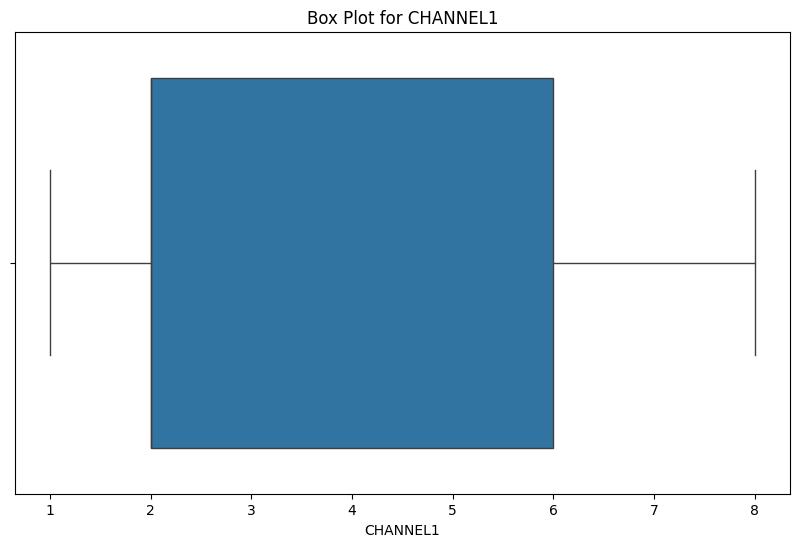

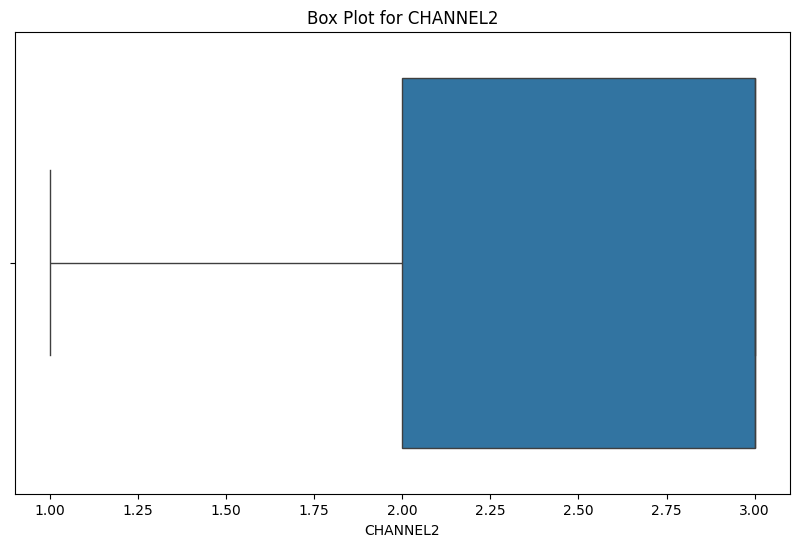

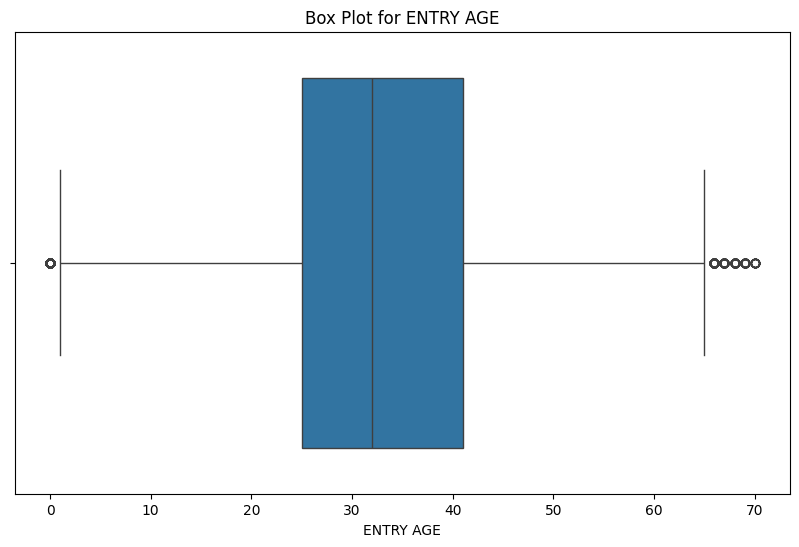

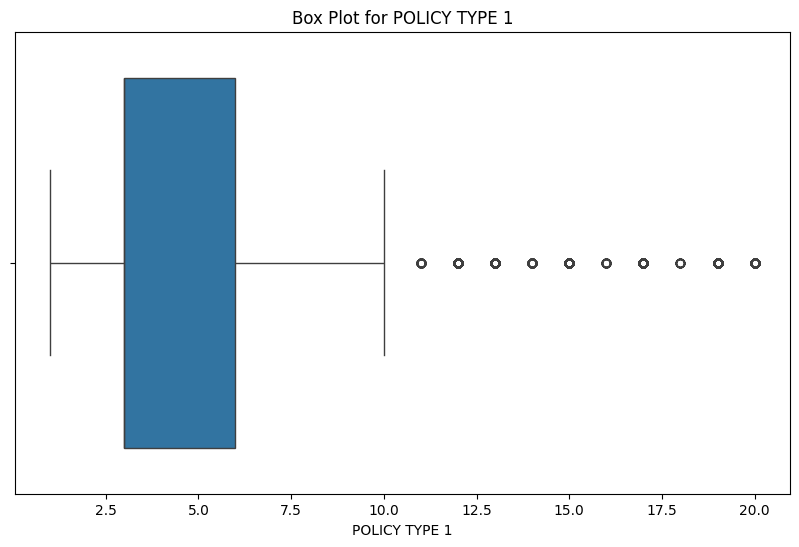

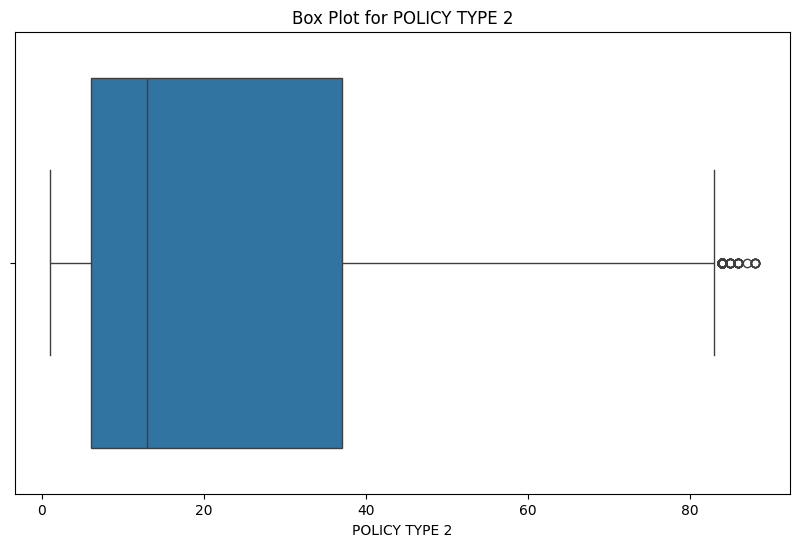

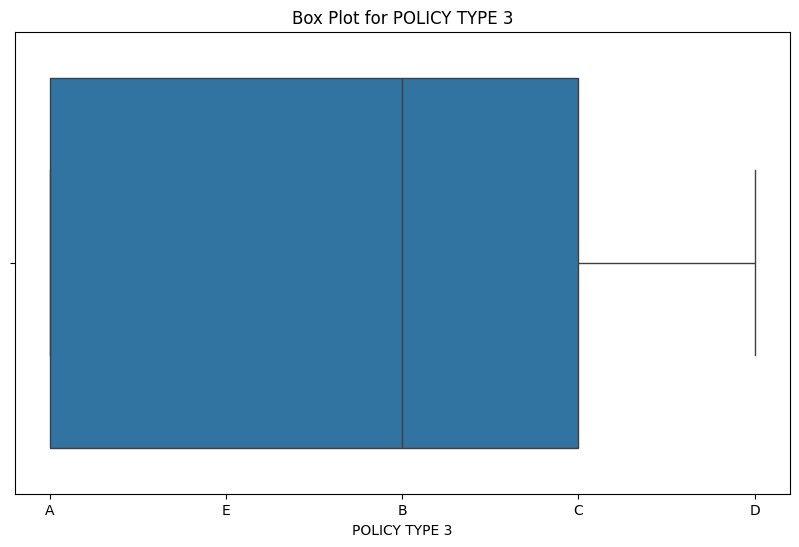

In [13]:
# Select only numerical columns
numerical_cols = ['CHANNEL1', 'CHANNEL2', 'ENTRY AGE', 'POLICY TYPE 1', 'POLICY TYPE 2', 'POLICY TYPE 3']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

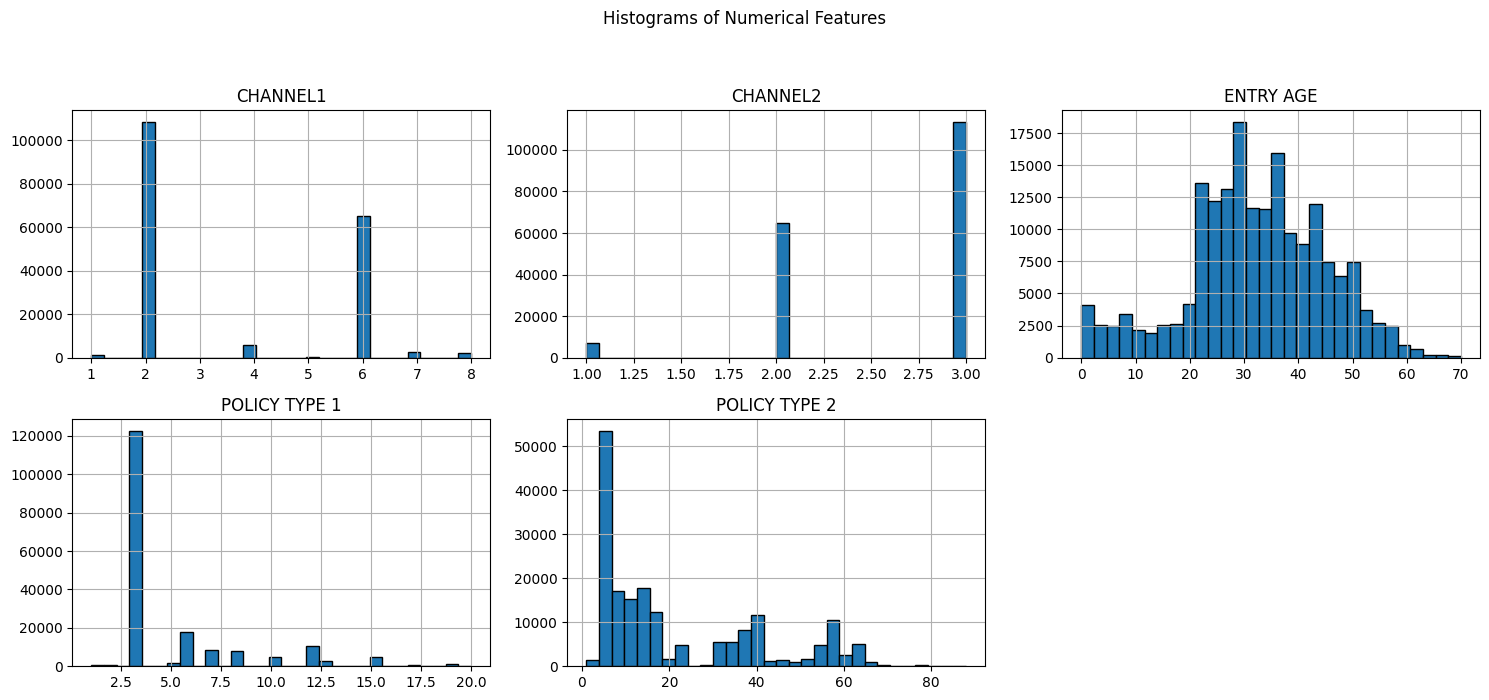

In [14]:
# Plot histograms for numerical columns to visualize the distribution of features.
df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [15]:
#Unique Values for Policy Status Column
unique_policy_status = df['POLICY STATUS'].unique()

unique_policy_status

array(['Inforce', 'Lapse', 'Expired', 'Surrender', 'Death'], dtype=object)

IS_LAPSE
1    98865
0    86695
Name: count, dtype: int64


<ipython-input-16-90e59ce838d4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lapse_counts.index, y=lapse_counts.values, palette='viridis')


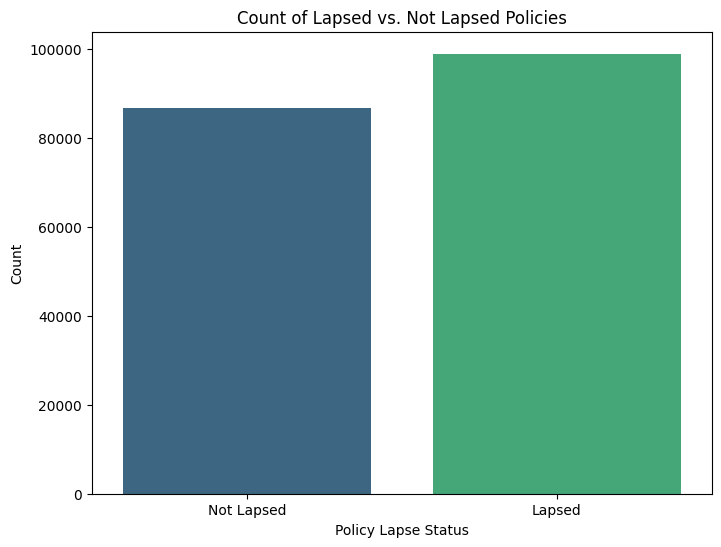

In [16]:
# Create the binary target column
df['IS_LAPSE'] = df['POLICY STATUS'].apply(lambda x: 1 if x == 'Lapse' else 0)

# Check the distribution of the new binary target column
lapse_counts = df['IS_LAPSE'].value_counts()
print(lapse_counts)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=lapse_counts.index, y=lapse_counts.values, palette='viridis')
plt.xlabel('Policy Lapse Status')
plt.ylabel('Count')
plt.title('Count of Lapsed vs. Not Lapsed Policies')
plt.xticks([0, 1], ['Not Lapsed', 'Lapsed'])
plt.show()

# Encode other categorical variables if needed
label_encoders = {}
for column in df.select_dtypes(include=['object', 'category']).columns:
    if column != 'POLICY STATUS':  # Skip the original policy status column
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Drop the original 'POLICY STATUS'
df.drop(columns=['POLICY STATUS'], inplace=True)

In [17]:
#Print Top 5 Rows
df.head()

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,BENEFIT,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date,PAYMENT MODE_Monthly,PAYMENT MODE_Quaterly,PAYMENT MODE_Semiannually,PAYMENT MODE_Single Premium,NON LAPSE GUARANTEED_NLG Not Active,NON LAPSE GUARANTEED_NLG Suspend,NON LAPSE GUARANTEED_NO NLG,IS_LAPSE
0,1,1,1,36,0,1,1,0,826,0.0,0,0.0,0,8.000000,9,1349,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1,1,1,42,1,1,2,0,147,0.0,0,0.0,0,8.000000,9,1201,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,1,1,2,40,1,2,3,0,2605,0.0,0,0.0,0,8.000000,9,198,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1,1,3,39,1,1,2,0,147,0.0,0,0.0,0,8.000000,9,1232,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1,1,4,44,1,1,2,0,147,0.0,0,0.0,0,7.916667,8,700,89,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


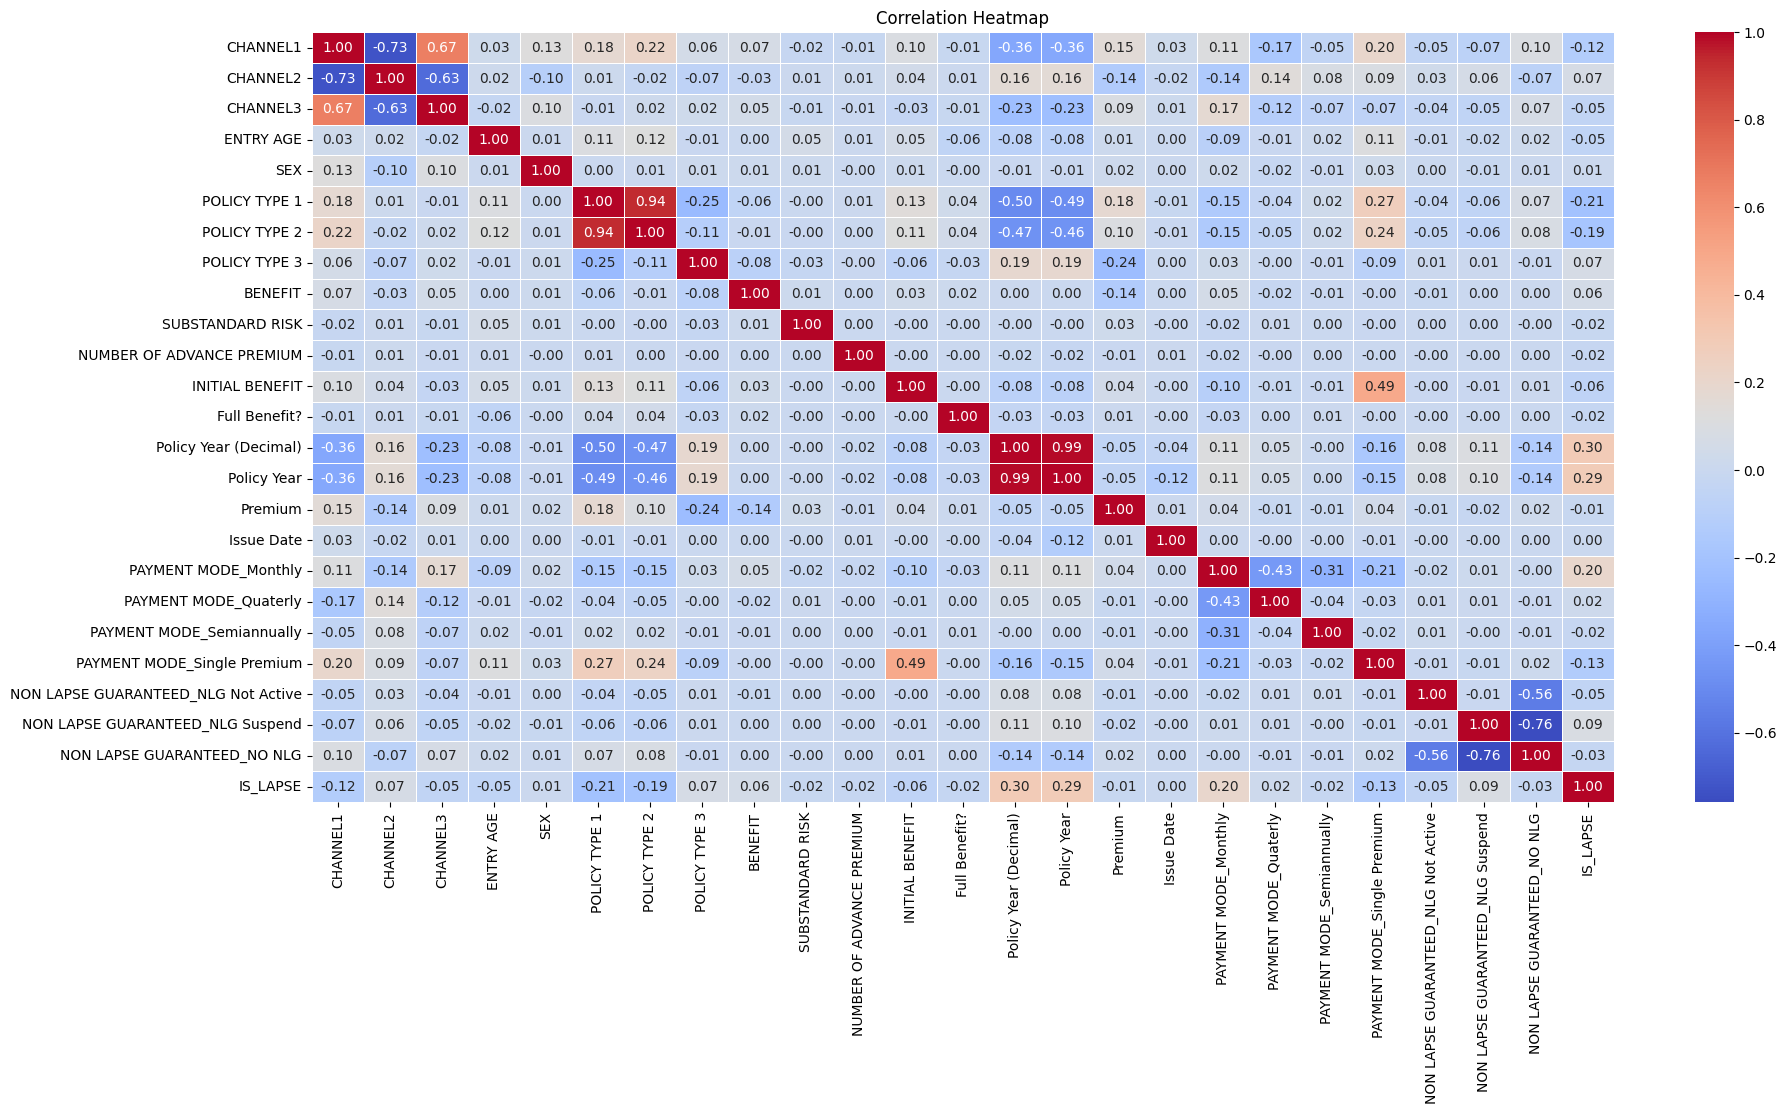

In [18]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(21, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Identify features with strong correlation to target
corr_with_target = corr_matrix['IS_LAPSE'].abs().sort_values(ascending=False)
print("Features most correlated with 'IS_LAPSE':\n", corr_with_target)

Features most correlated with 'IS_LAPSE':
 IS_LAPSE                               1.000000
Policy Year (Decimal)                  0.297374
Policy Year                            0.289503
POLICY TYPE 1                          0.205608
PAYMENT MODE_Monthly                   0.201574
POLICY TYPE 2                          0.187489
PAYMENT MODE_Single Premium            0.127425
CHANNEL1                               0.122944
NON LAPSE GUARANTEED_NLG Suspend       0.087757
CHANNEL2                               0.070720
POLICY TYPE 3                          0.066886
INITIAL BENEFIT                        0.062336
BENEFIT                                0.057667
ENTRY AGE                              0.052283
NON LAPSE GUARANTEED_NLG Not Active    0.047123
CHANNEL3                               0.047078
NON LAPSE GUARANTEED_NO NLG            0.028657
Full Benefit?                          0.024552
PAYMENT MODE_Semiannually              0.022161
PAYMENT MODE_Quaterly                  0.0197